In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [7]:
data = pd.read_csv('CO2_Emissions_Canada.csv')

In [9]:
print(data.isnull().sum()) #checking for missing values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [11]:
print(data.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [13]:
print(data.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [55]:
#selecting features
x = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (mpg)']]
y = data['CO2 Emissions(g/km)']

In [57]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [59]:
#train model
#creating linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
print("Model trained successfully!!")

Model trained successfully!!


In [61]:
#predicting co2 emissions
y_pred = model.predict(x_test)
print(y_pred[:10])

[257.47539485 321.64695922 324.91966944 306.46755914 296.33368749
 323.9648677  250.98439433 216.14958011 236.70106762 224.20170617]


In [63]:
print(x.columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (mpg)'],
      dtype='object')


In [65]:
#Testing using sample input data
sample_input =[[3.0, 6, 12.0, 8.0, 10.0]]
sample_input_df = pd.DataFrame(sample_input, columns=x.columns)
prediction = model.predict(sample_input_df)
print(f"Predicted CO2 Emissions: {prediction[0]:.2f} g/km")

Predicted CO2 Emissions: 307.17 g/km


In [67]:
#model's evaluation 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 337.4597605023134
R-squared: 0.9018906062103024


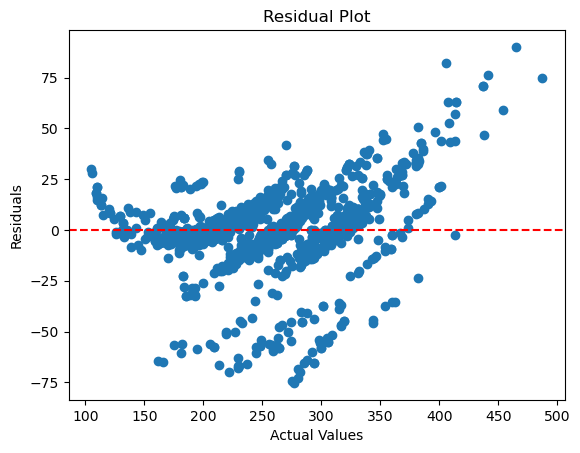

In [69]:
import matplotlib.pyplot as plt 
residuals = y_test - y_pred #calculate residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [1]:
import os
os.getcwd()

'C:\\Users\\Chhama'